In [184]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [185]:
df =pd.read_csv('salaries.csv')
df.head(3)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1


In [186]:
print('Column Name \t Total Null Count')
df.isnull().sum()

Column Name 	 Total Null Count


company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [187]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [188]:
df['company'] = label_encoder.fit_transform(df['company'])
df['job'] = label_encoder.fit_transform(df['job'])
df['degree'] = label_encoder.fit_transform(df['degree'])

df.tail(3)

,company,job,degree,salary_more_then_100k
13,1,0,1,1
14,1,1,0,1
15,1,1,1,1


In [189]:
X = df.drop('salary_more_then_100k', axis=1)
y = df[['salary_more_then_100k']]
X.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [192]:
decision_tree_model.score(X_test, y_test)

0.75

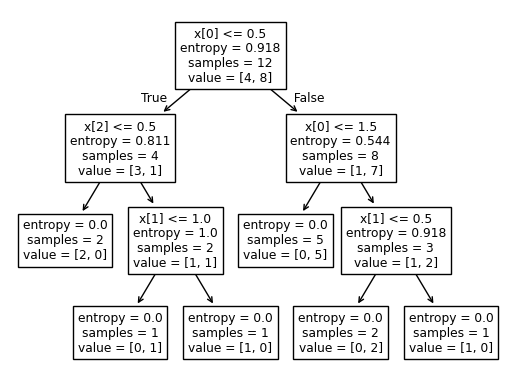

In [193]:
plot_tree(decision_tree_model)
plt.show()

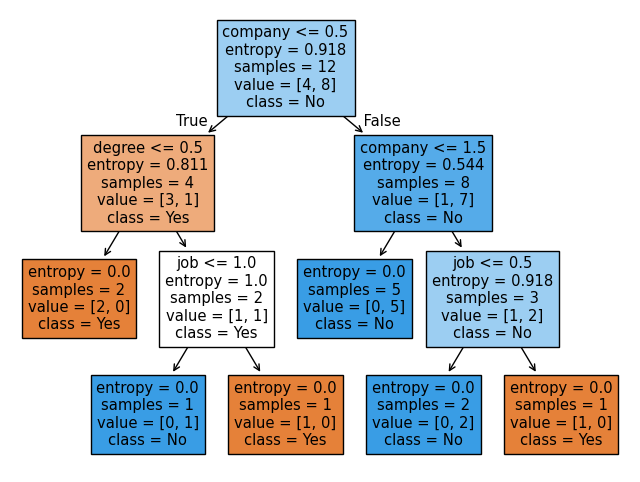

In [194]:
feature_names = ["company", "job", "degree"]
target_names = ["Yes", "No"]
plt.figure(figsize=(8, 6))
plot_tree(decision_tree_model, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()